# -------------------------------------------------Pipeline-------------------------------------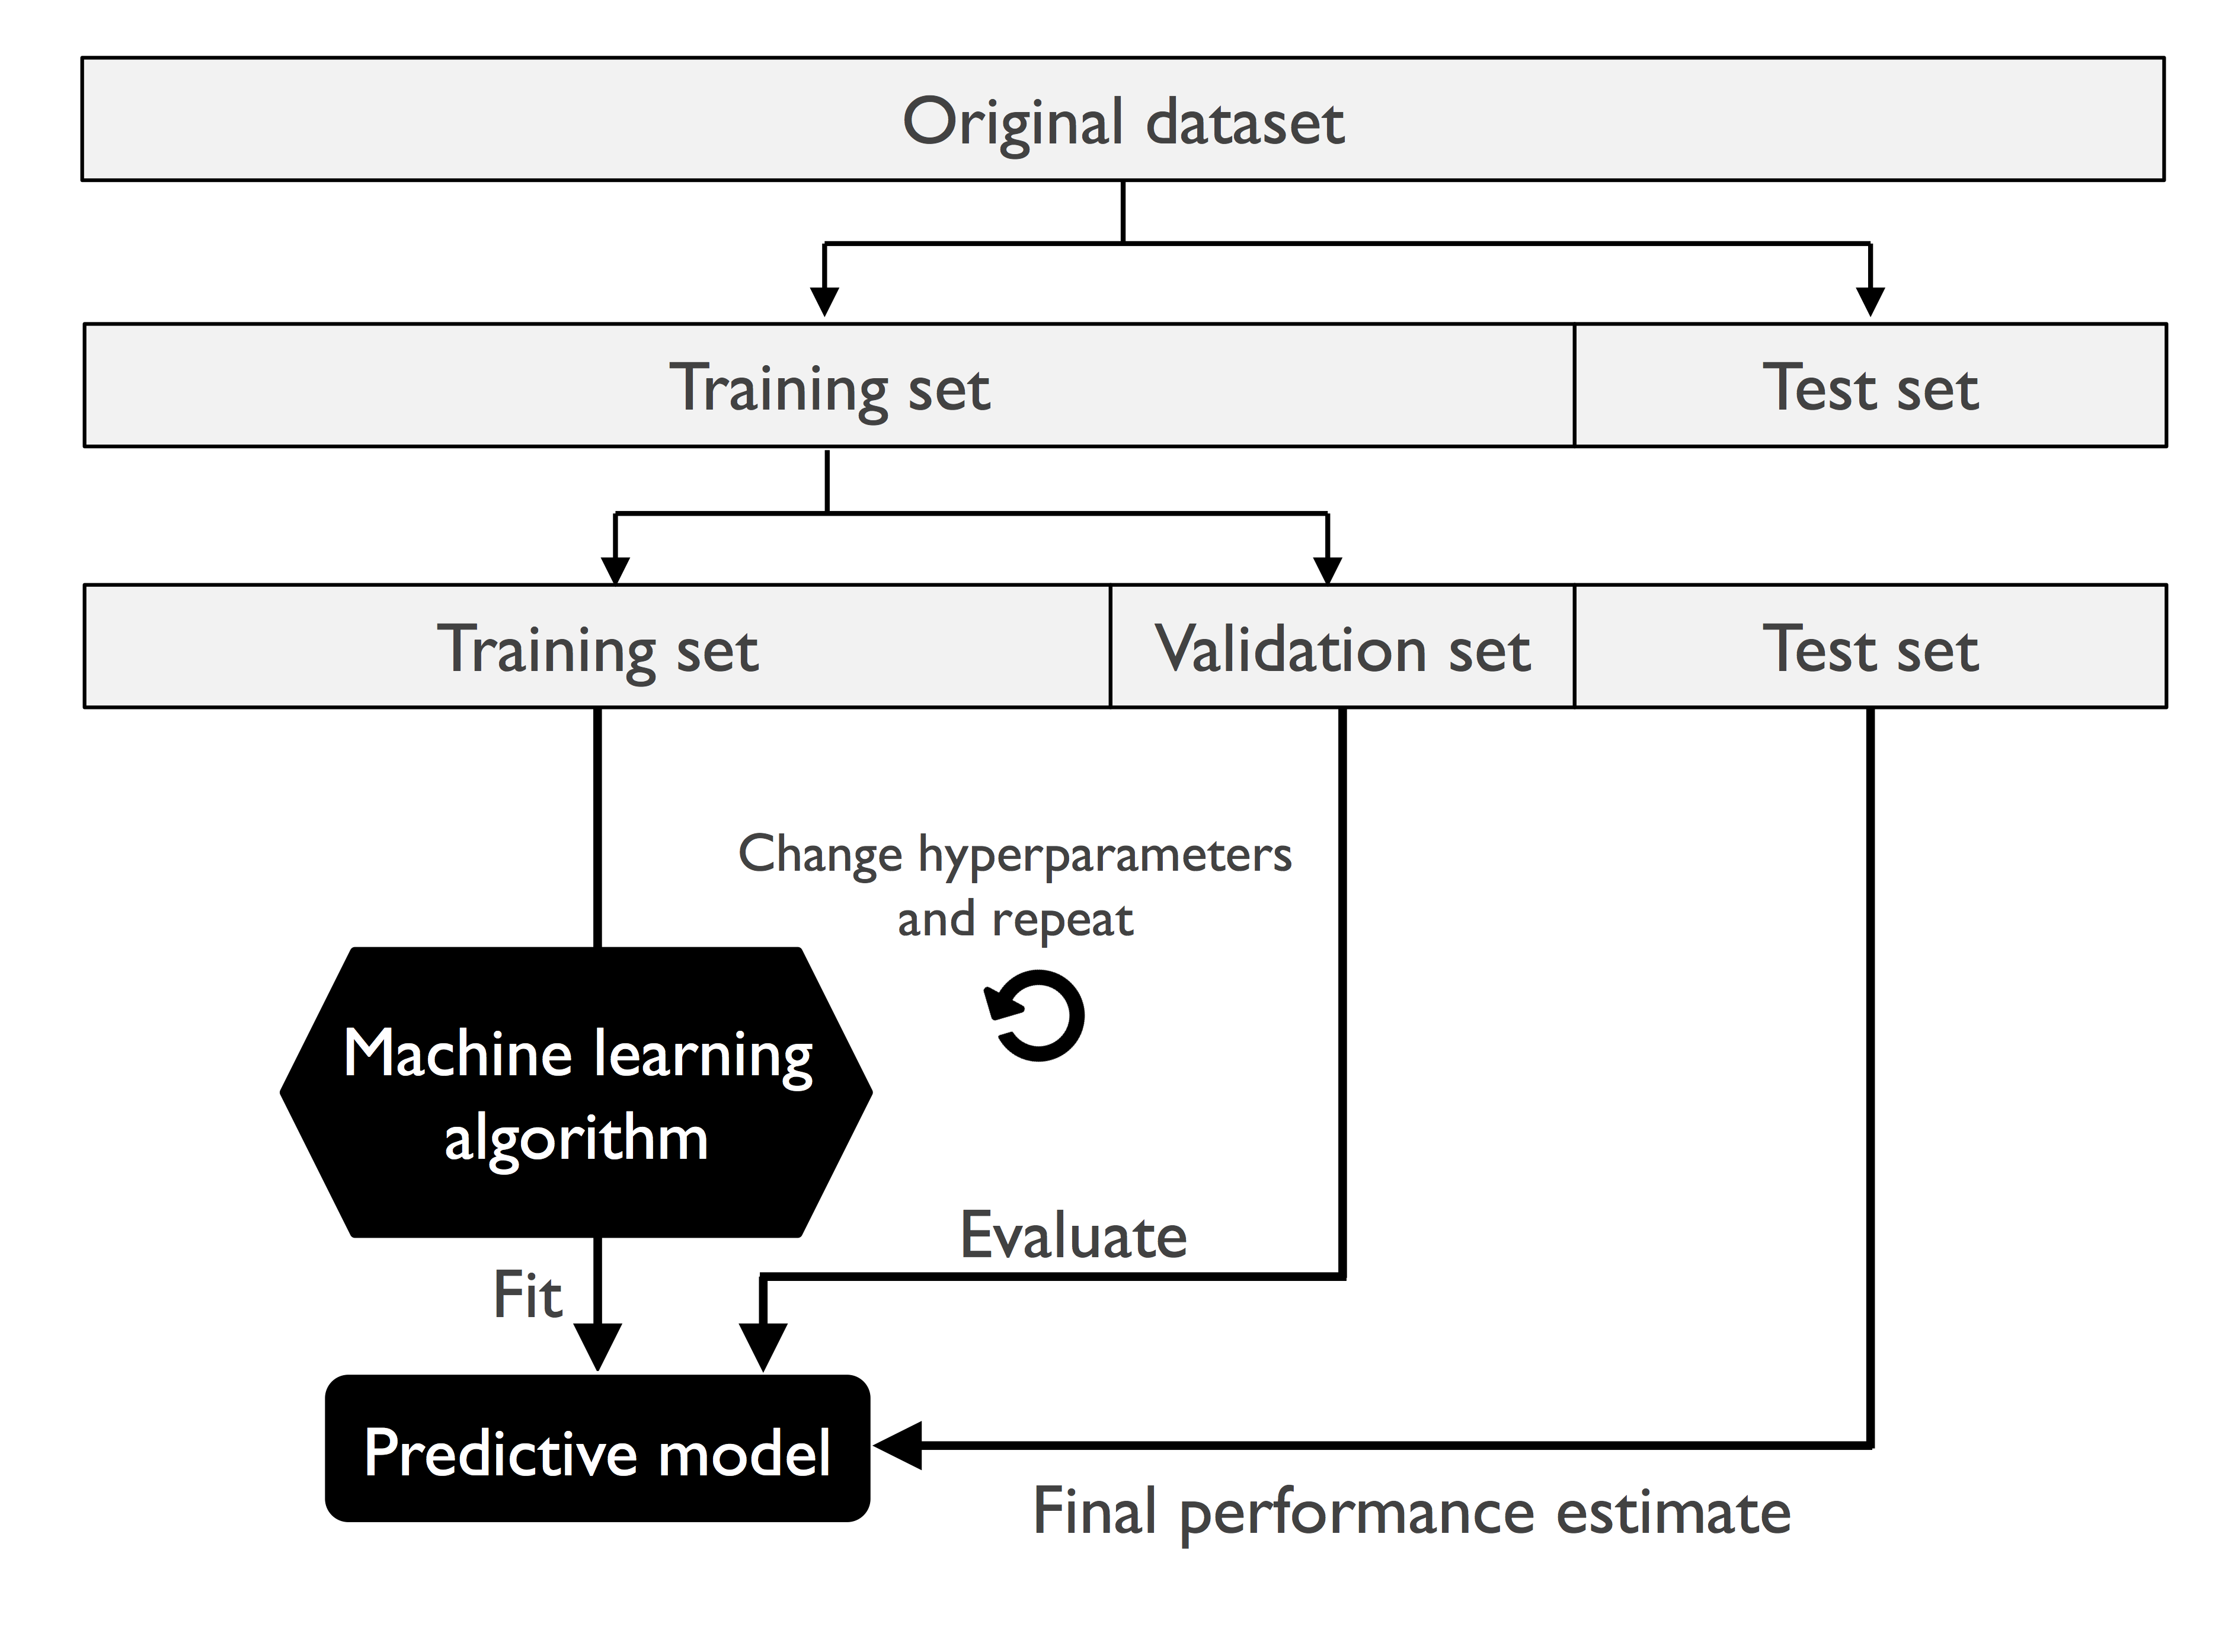

In [82]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
import math, time
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# Change Tax to CSV
data = pd.read_csv('Tax.csv', encoding= 'unicode_escape')

In [84]:
data.head(5)

Year  BottomBracketTaxableIncome TopBracketRate  \
0  2020                       19400             37   
1  2019                       19400             37   
2  2018                       19050             37   
3  2017                       18650           39.6   
4  2016                       18550           39.6   

   TopBracketTaxableIncomeOver  
0                       622050  
1                       612350  
2                       600000  
3                       470700  
4                       466950

In [85]:
data.describe()

Year  BottomBracketTaxableIncome  TopBracketTaxableIncomeOver
count   109.000000                  109.000000                 1.090000e+02
mean   1966.229358                10483.486239                 6.330416e+05
std      31.303364                12310.276148                 1.107396e+06
min    1913.000000                 1000.000000                 2.975000e+04
25%    1939.000000                 2100.000000                 2.000000e+05
50%    1966.000000                 4000.000000                 3.191000e+05
75%    1993.000000                17000.000000                 4.576000e+05
max    2020.000000                45200.000000                 5.000000e+06

In [80]:
data.dtypes

Year                            int64
BottomBracketRate              object
BottomBracketTaxableIncome      int64
TopBracketRate                 object
TopBracketTaxableIncomeOver     int64
dtype: object

In [89]:
data['Year'] = data['Year'].astype(float)

In [90]:
data['TopBracketTaxableIncomeOver'] = data['TopBracketTaxableIncomeOver'].astype(float)

In [91]:
data['TopBracketRate'] = data['TopBracketRate'].astype(float)

In [93]:
data['BottomBracketTaxableIncome'] = data['BottomBracketTaxableIncome'].astype(float)

In [94]:
data.dtypes

Year                           float64
BottomBracketTaxableIncome     float64
TopBracketRate                 float64
TopBracketTaxableIncomeOver    float64
dtype: object

In [108]:
#Convert it into arrays for our machine to process
dataset = data.values #Converting our dataframe into an array

In [100]:
dataset.shape

(109, 4)

In [109]:
#splitting our dataset into input features (X) and labels
X = dataset[:,0:3]

In [104]:
X.shape

(109, 3)

In [110]:
Y = dataset[:,3]

In [111]:
Y.shape

(109,)

In [112]:
Y

array([ 622050.,  612350.,  600000.,  470700.,  466950.,  464850.,
        457600.,  450000.,  388350.,  379150.,  373650.,  372950.,
        357700.,  349700.,  336550.,  326450.,  319100.,  311950.,
        307050.,  297350.,  288350.,  283150.,  278450.,  271050.,
        263750.,  256500.,  250000.,  250000.,   86500.,   82150.,
         32450.,   30950.,   29750.,   90000.,  171580.,  165450.,
        159000.,  106000.,  106000.,  212000.,  212000.,  212000.,
        200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
        200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
        200000.,  200000.,  400000.,  400000.,  400000.,  400000.,
        400000.,  400000.,  400000.,  400000.,  400000.,  400000.,
        400000.,  400000.,  400000.,  400000.,  400000.,  400000.,
        400000.,  200000.,  200000.,  200000.,  200000.,  200000.,
        200000., 5000000., 5000000., 5000000., 5000000., 5000000.,
       5000000., 1000000., 1000000., 1000000., 1000000., 10000

In [113]:
#Train Test Split function to split dat
def train_test_split(X, Y, trs_len=0.90):
    lx=len(X)
    trs=int(lx*trs_len)
    X_train, Y_train = X[:trs], Y[:trs]
    X_test, Y_test = X[trs:], Y[trs:]
    return X_train, X_test, Y_train, Y_test

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [115]:
Y_train.shape

(98,)

In [116]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

In [117]:
X_train.shape

(98, 1, 3)

In [118]:
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [119]:
X_test.shape

(11, 1, 3)

## Setting up the Architecture
Hidden layer 1: 32 neurons, ReLU activation- Hidden layer 2: 32 neurons, ReLU activation- Output Layer: 1 neuron, Sigmoid activation

###  Neurone structure 
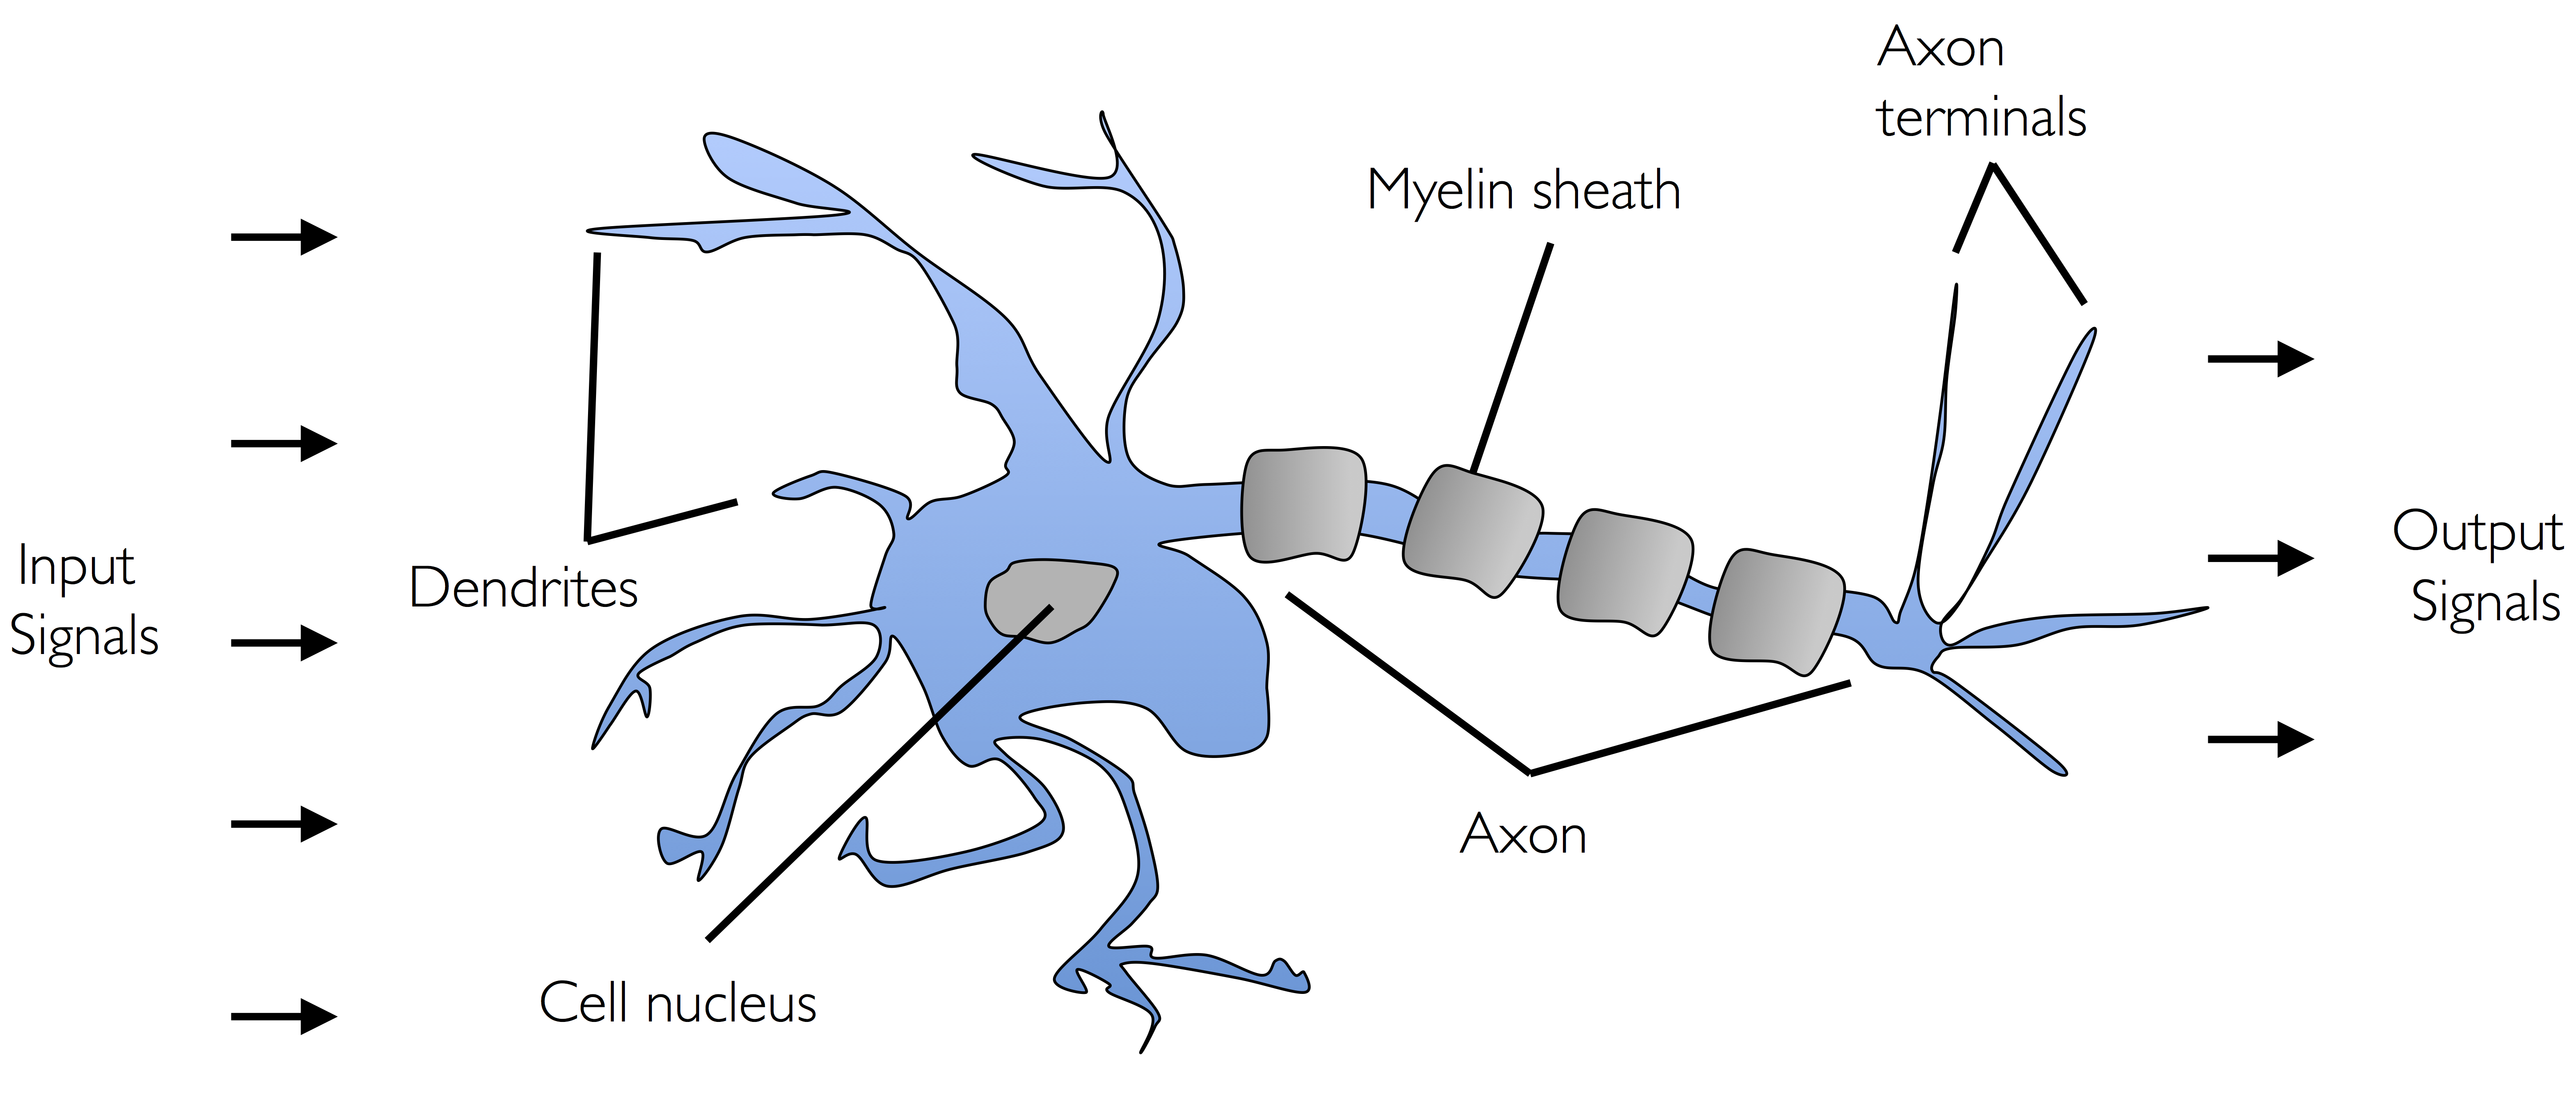
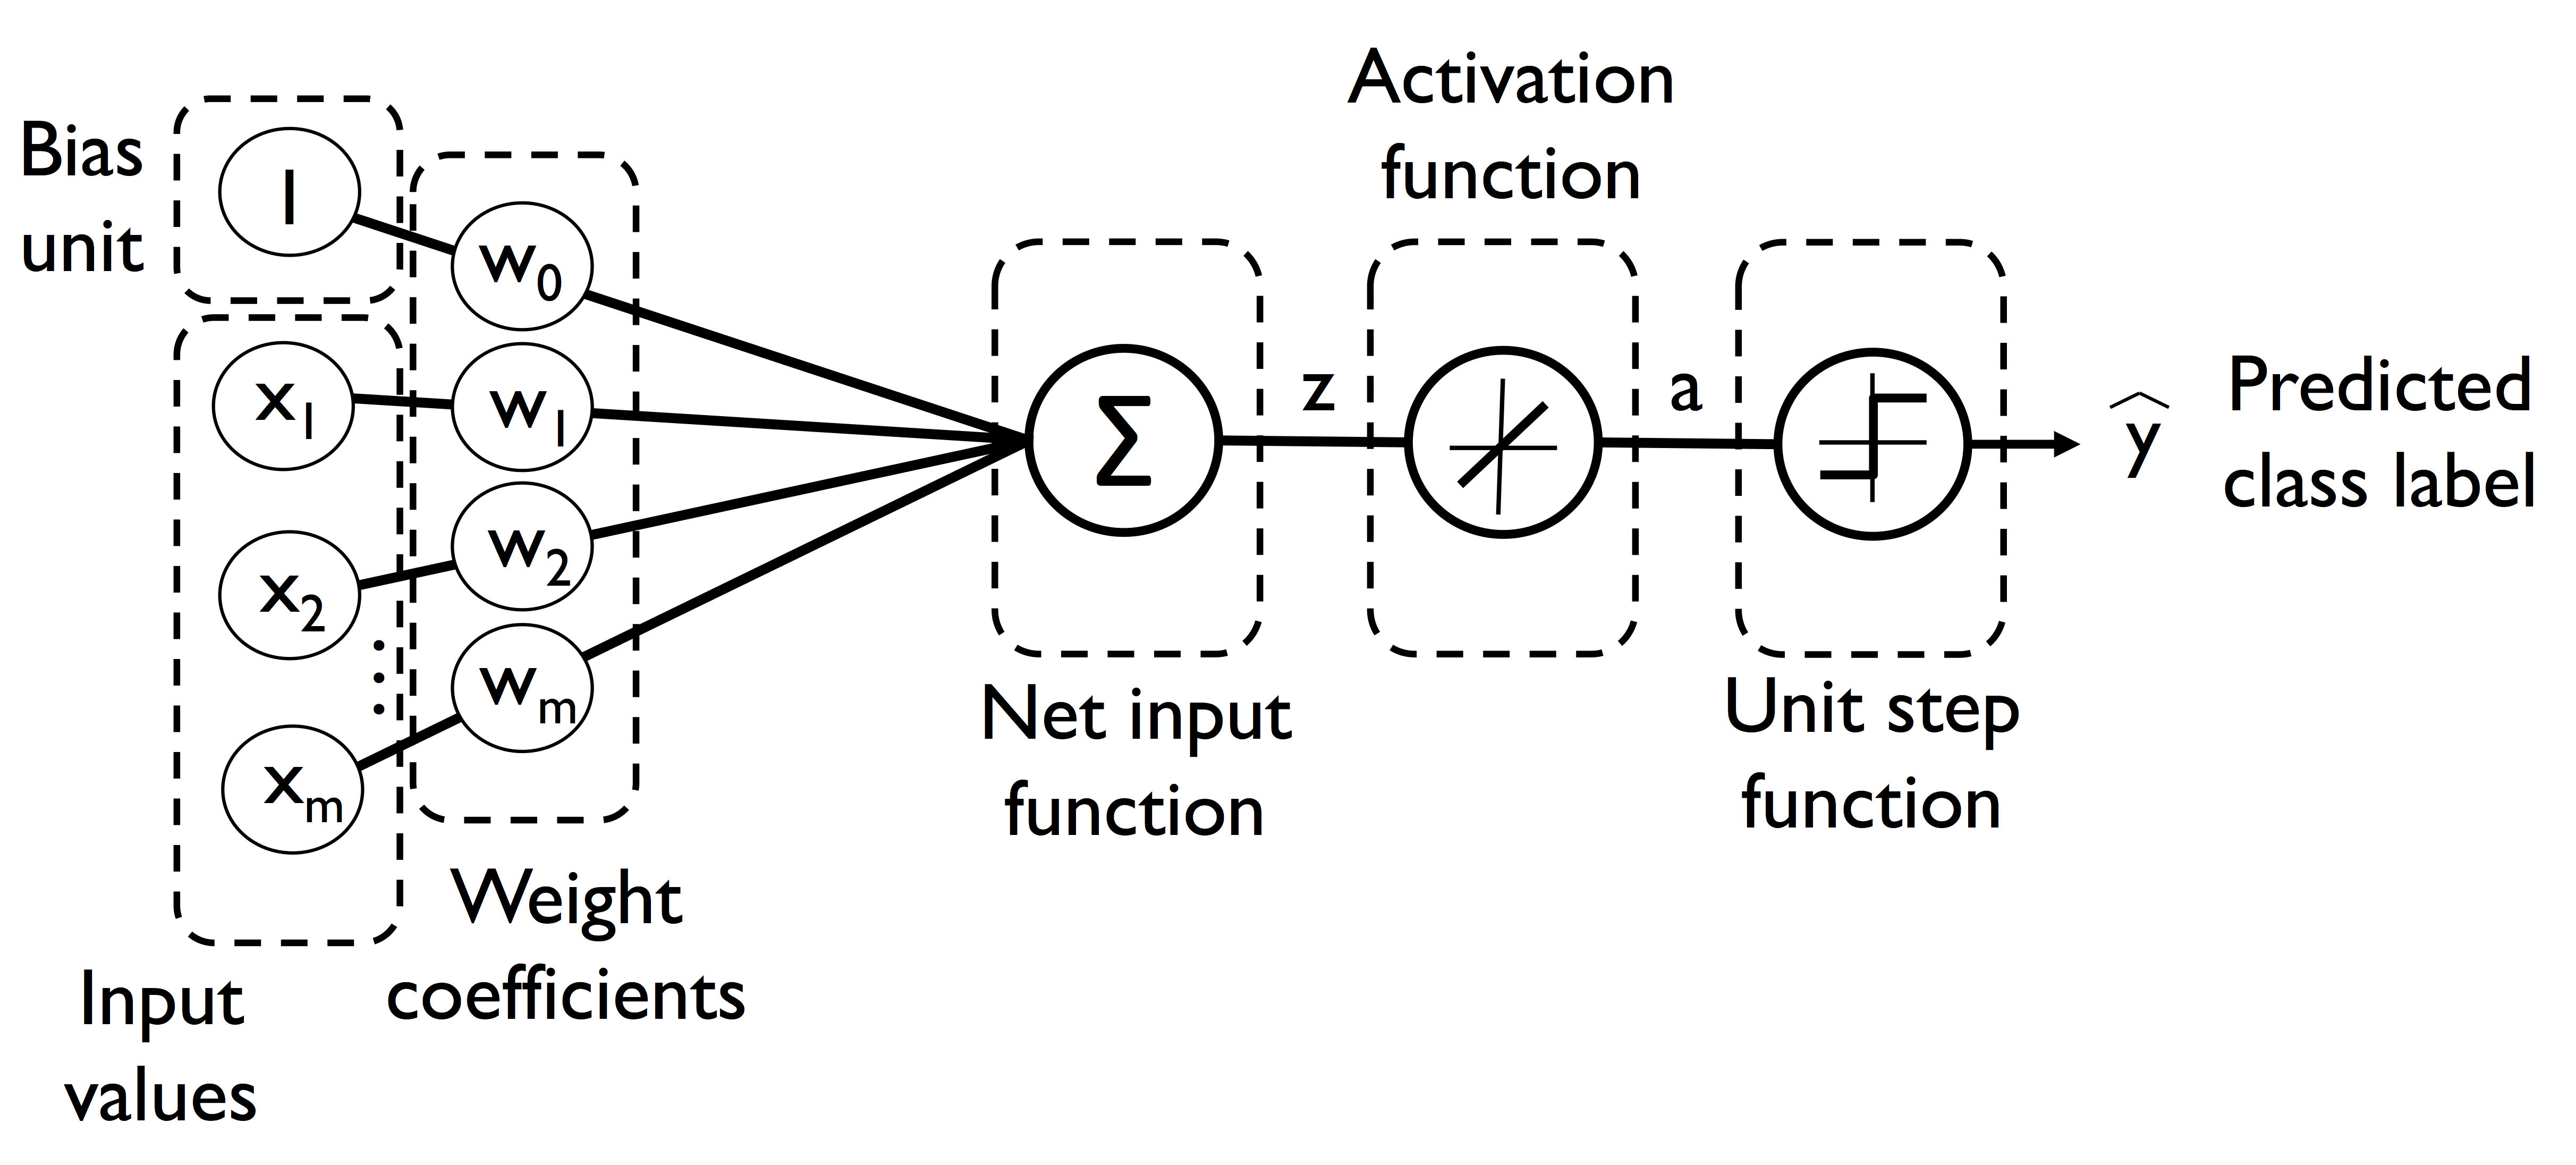

## Activation Function
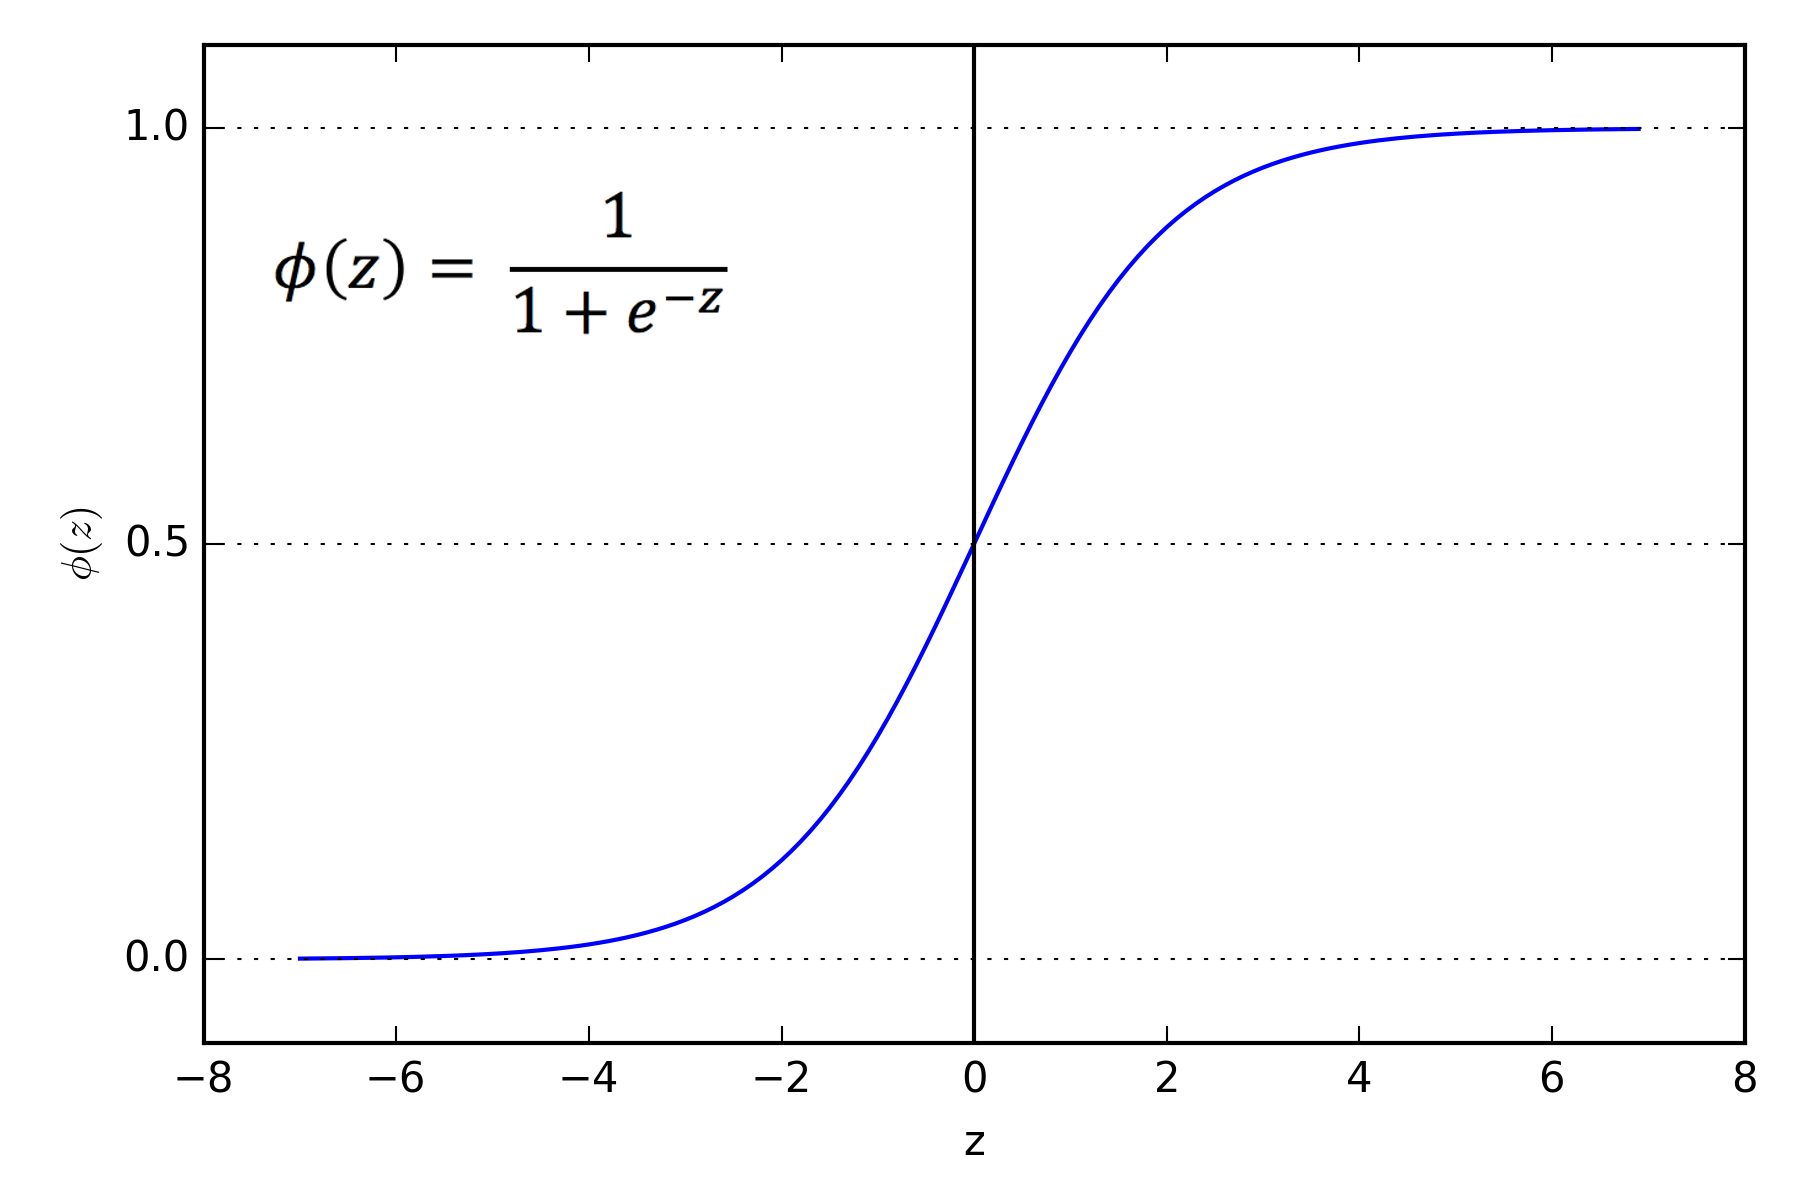

### Overal Model Anatomy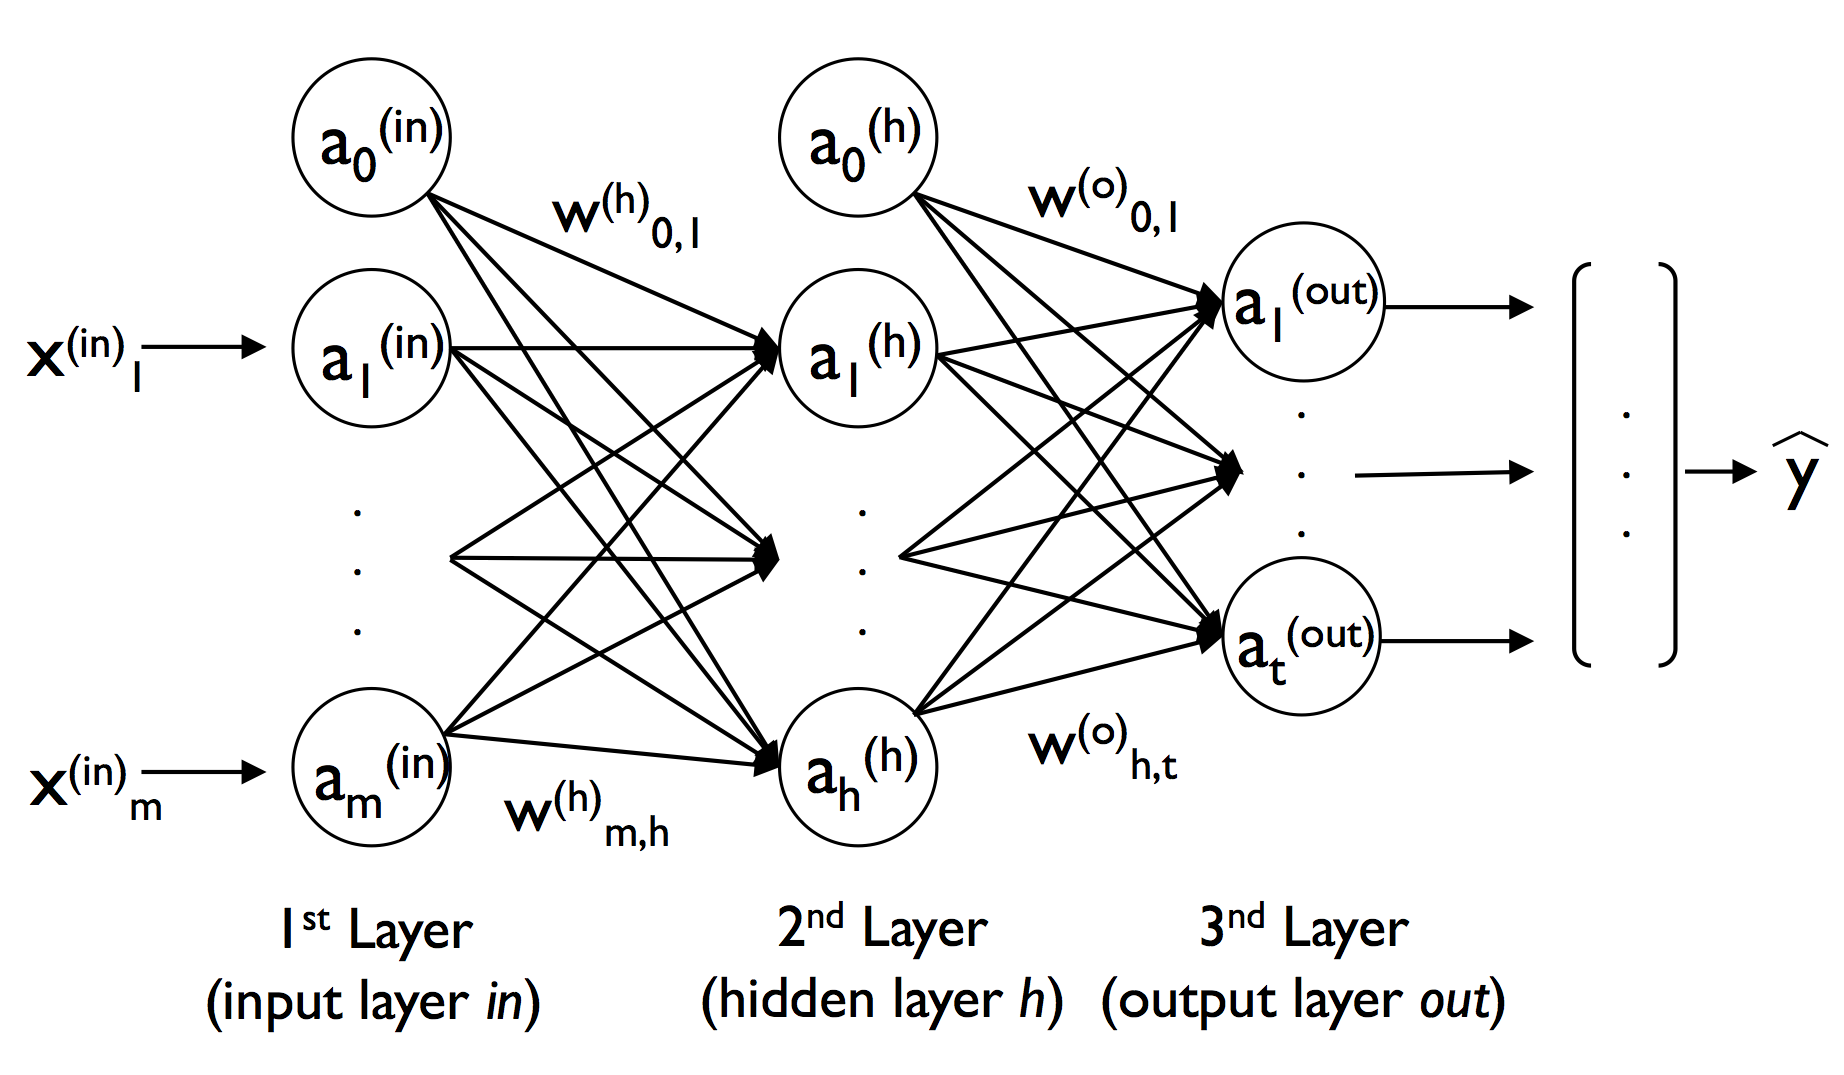

In [133]:
model = Sequential()
model.add(Dense(16, input_shape=(1, 3)))
model.add(Dense(16, activation='relu')) 
model.add(Dense(1))

In [134]:
print (model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1, 16)             64        
_________________________________________________________________
dense_19 (Dense)             (None, 1, 16)             272       
_________________________________________________________________
dense_20 (Dense)             (None, 1, 1)              17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


## 3D Structure of a Model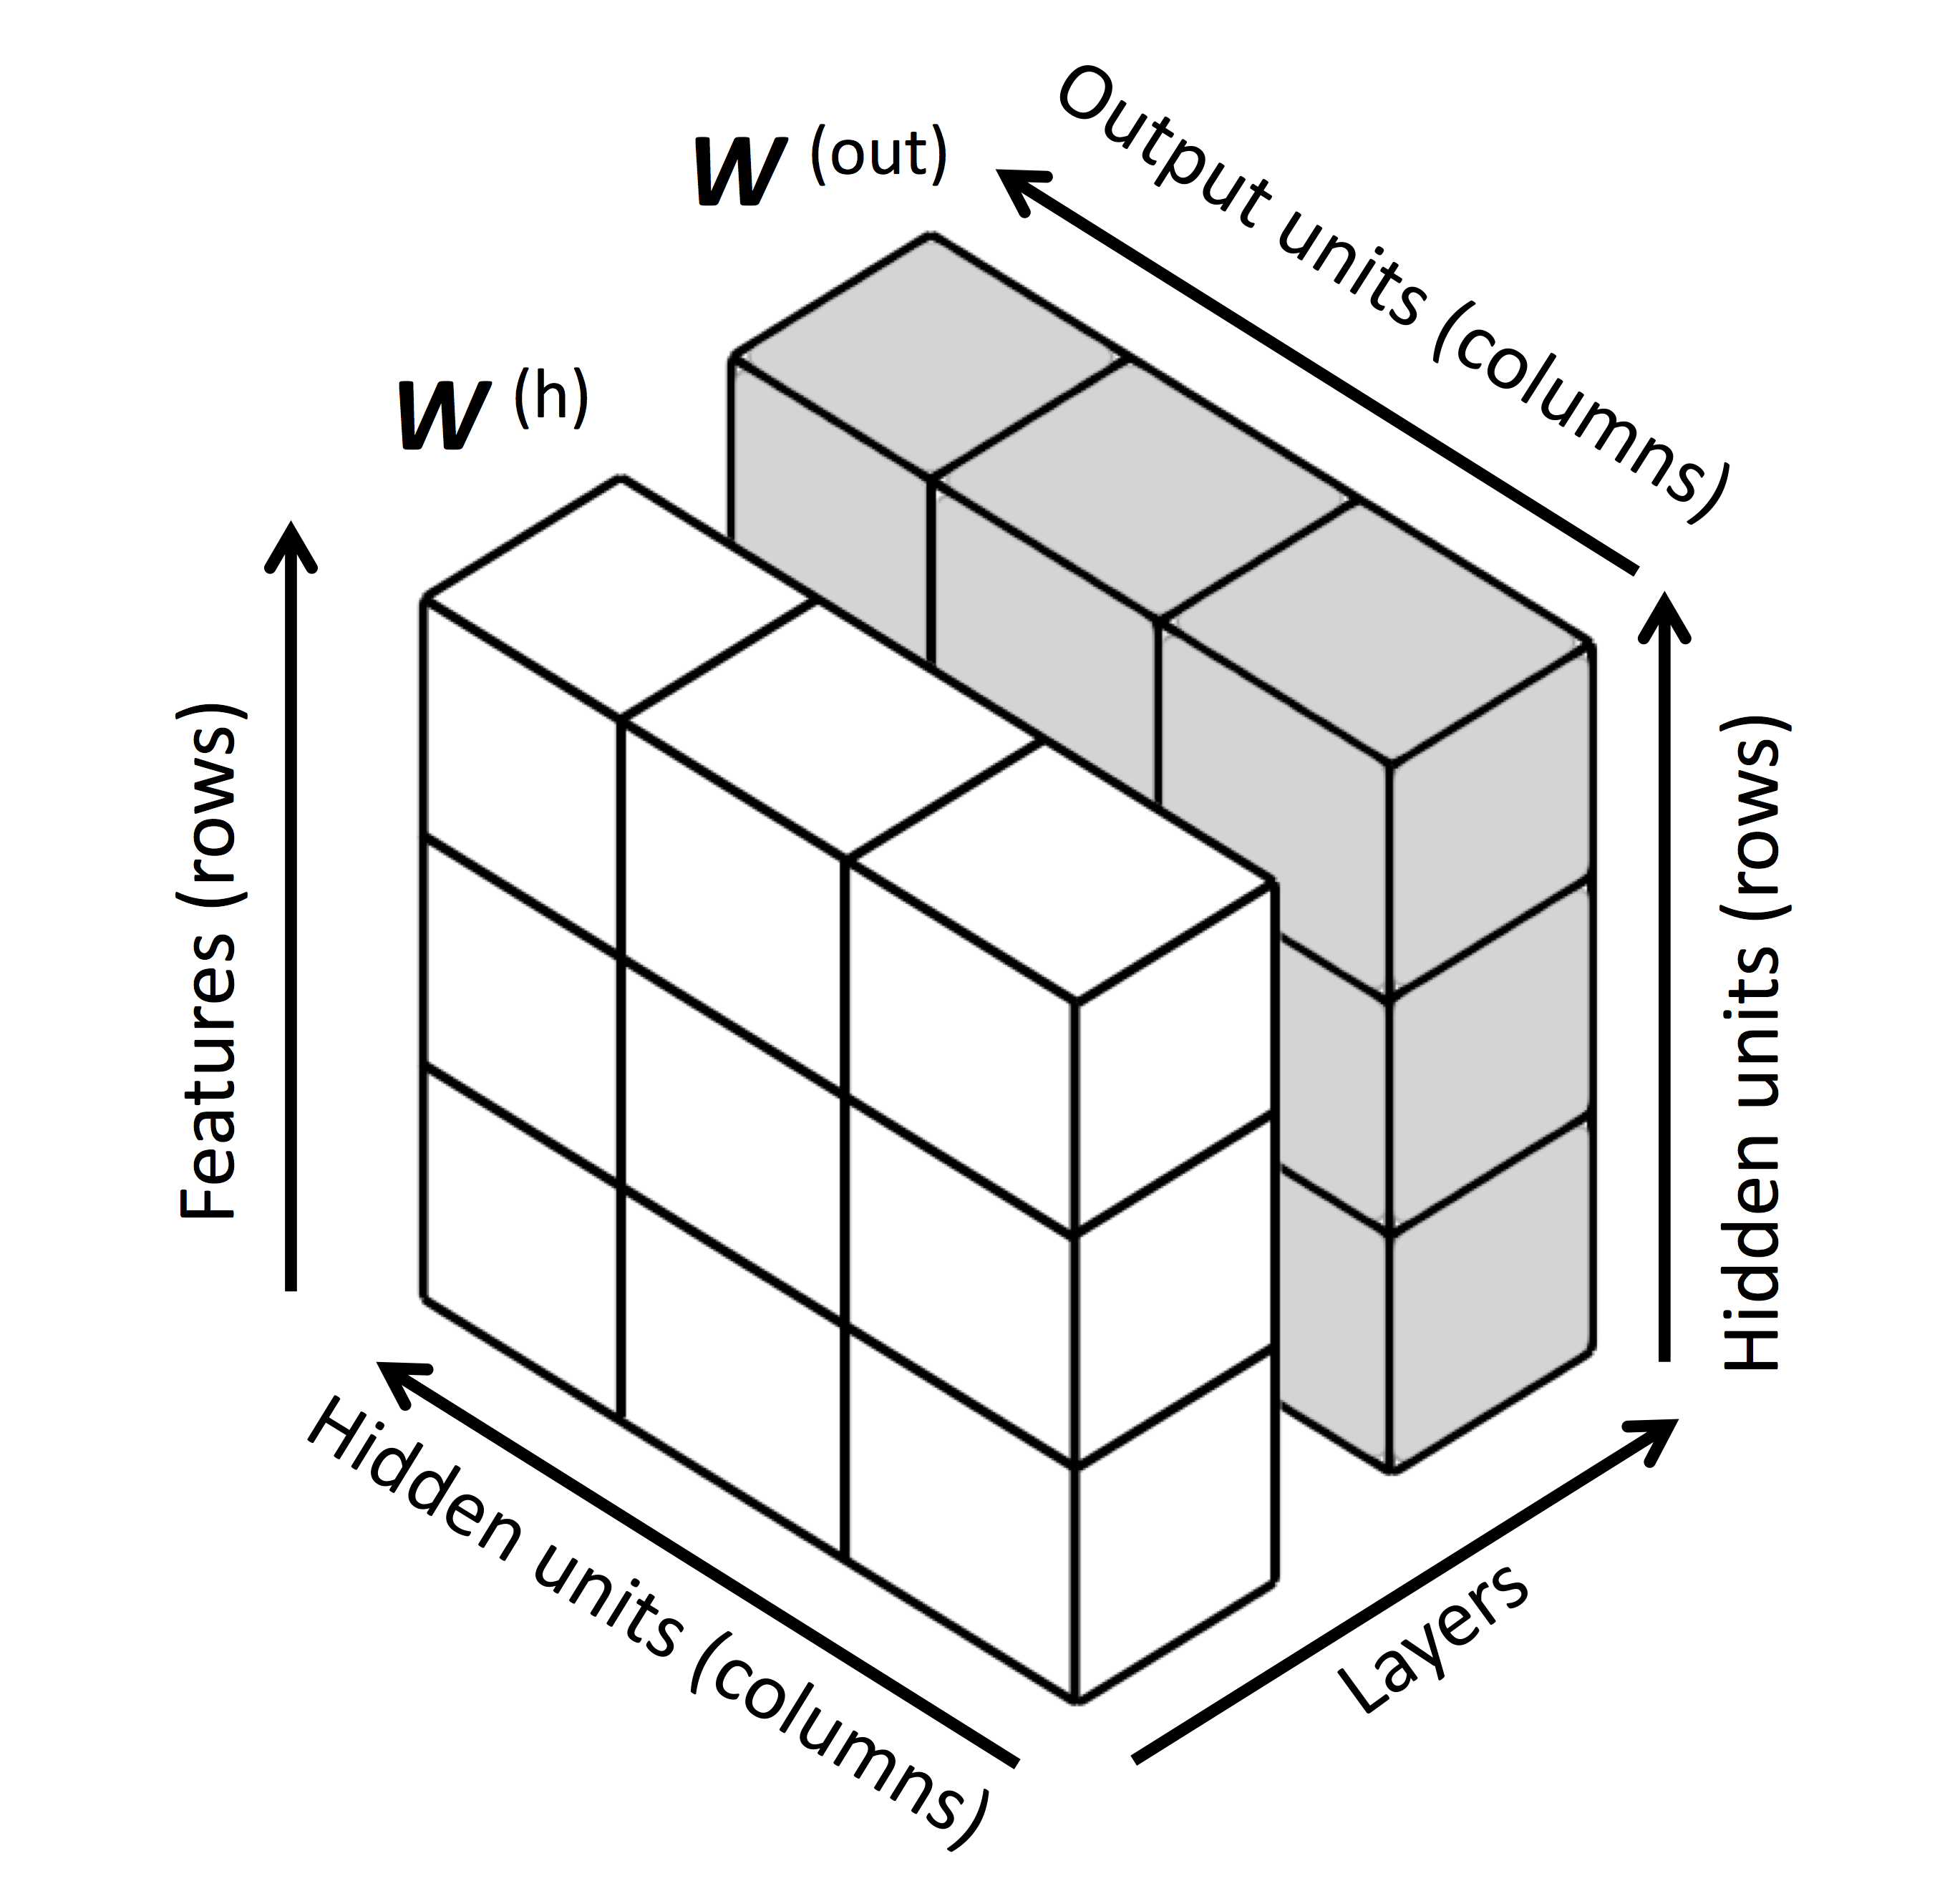

## ML Pipeline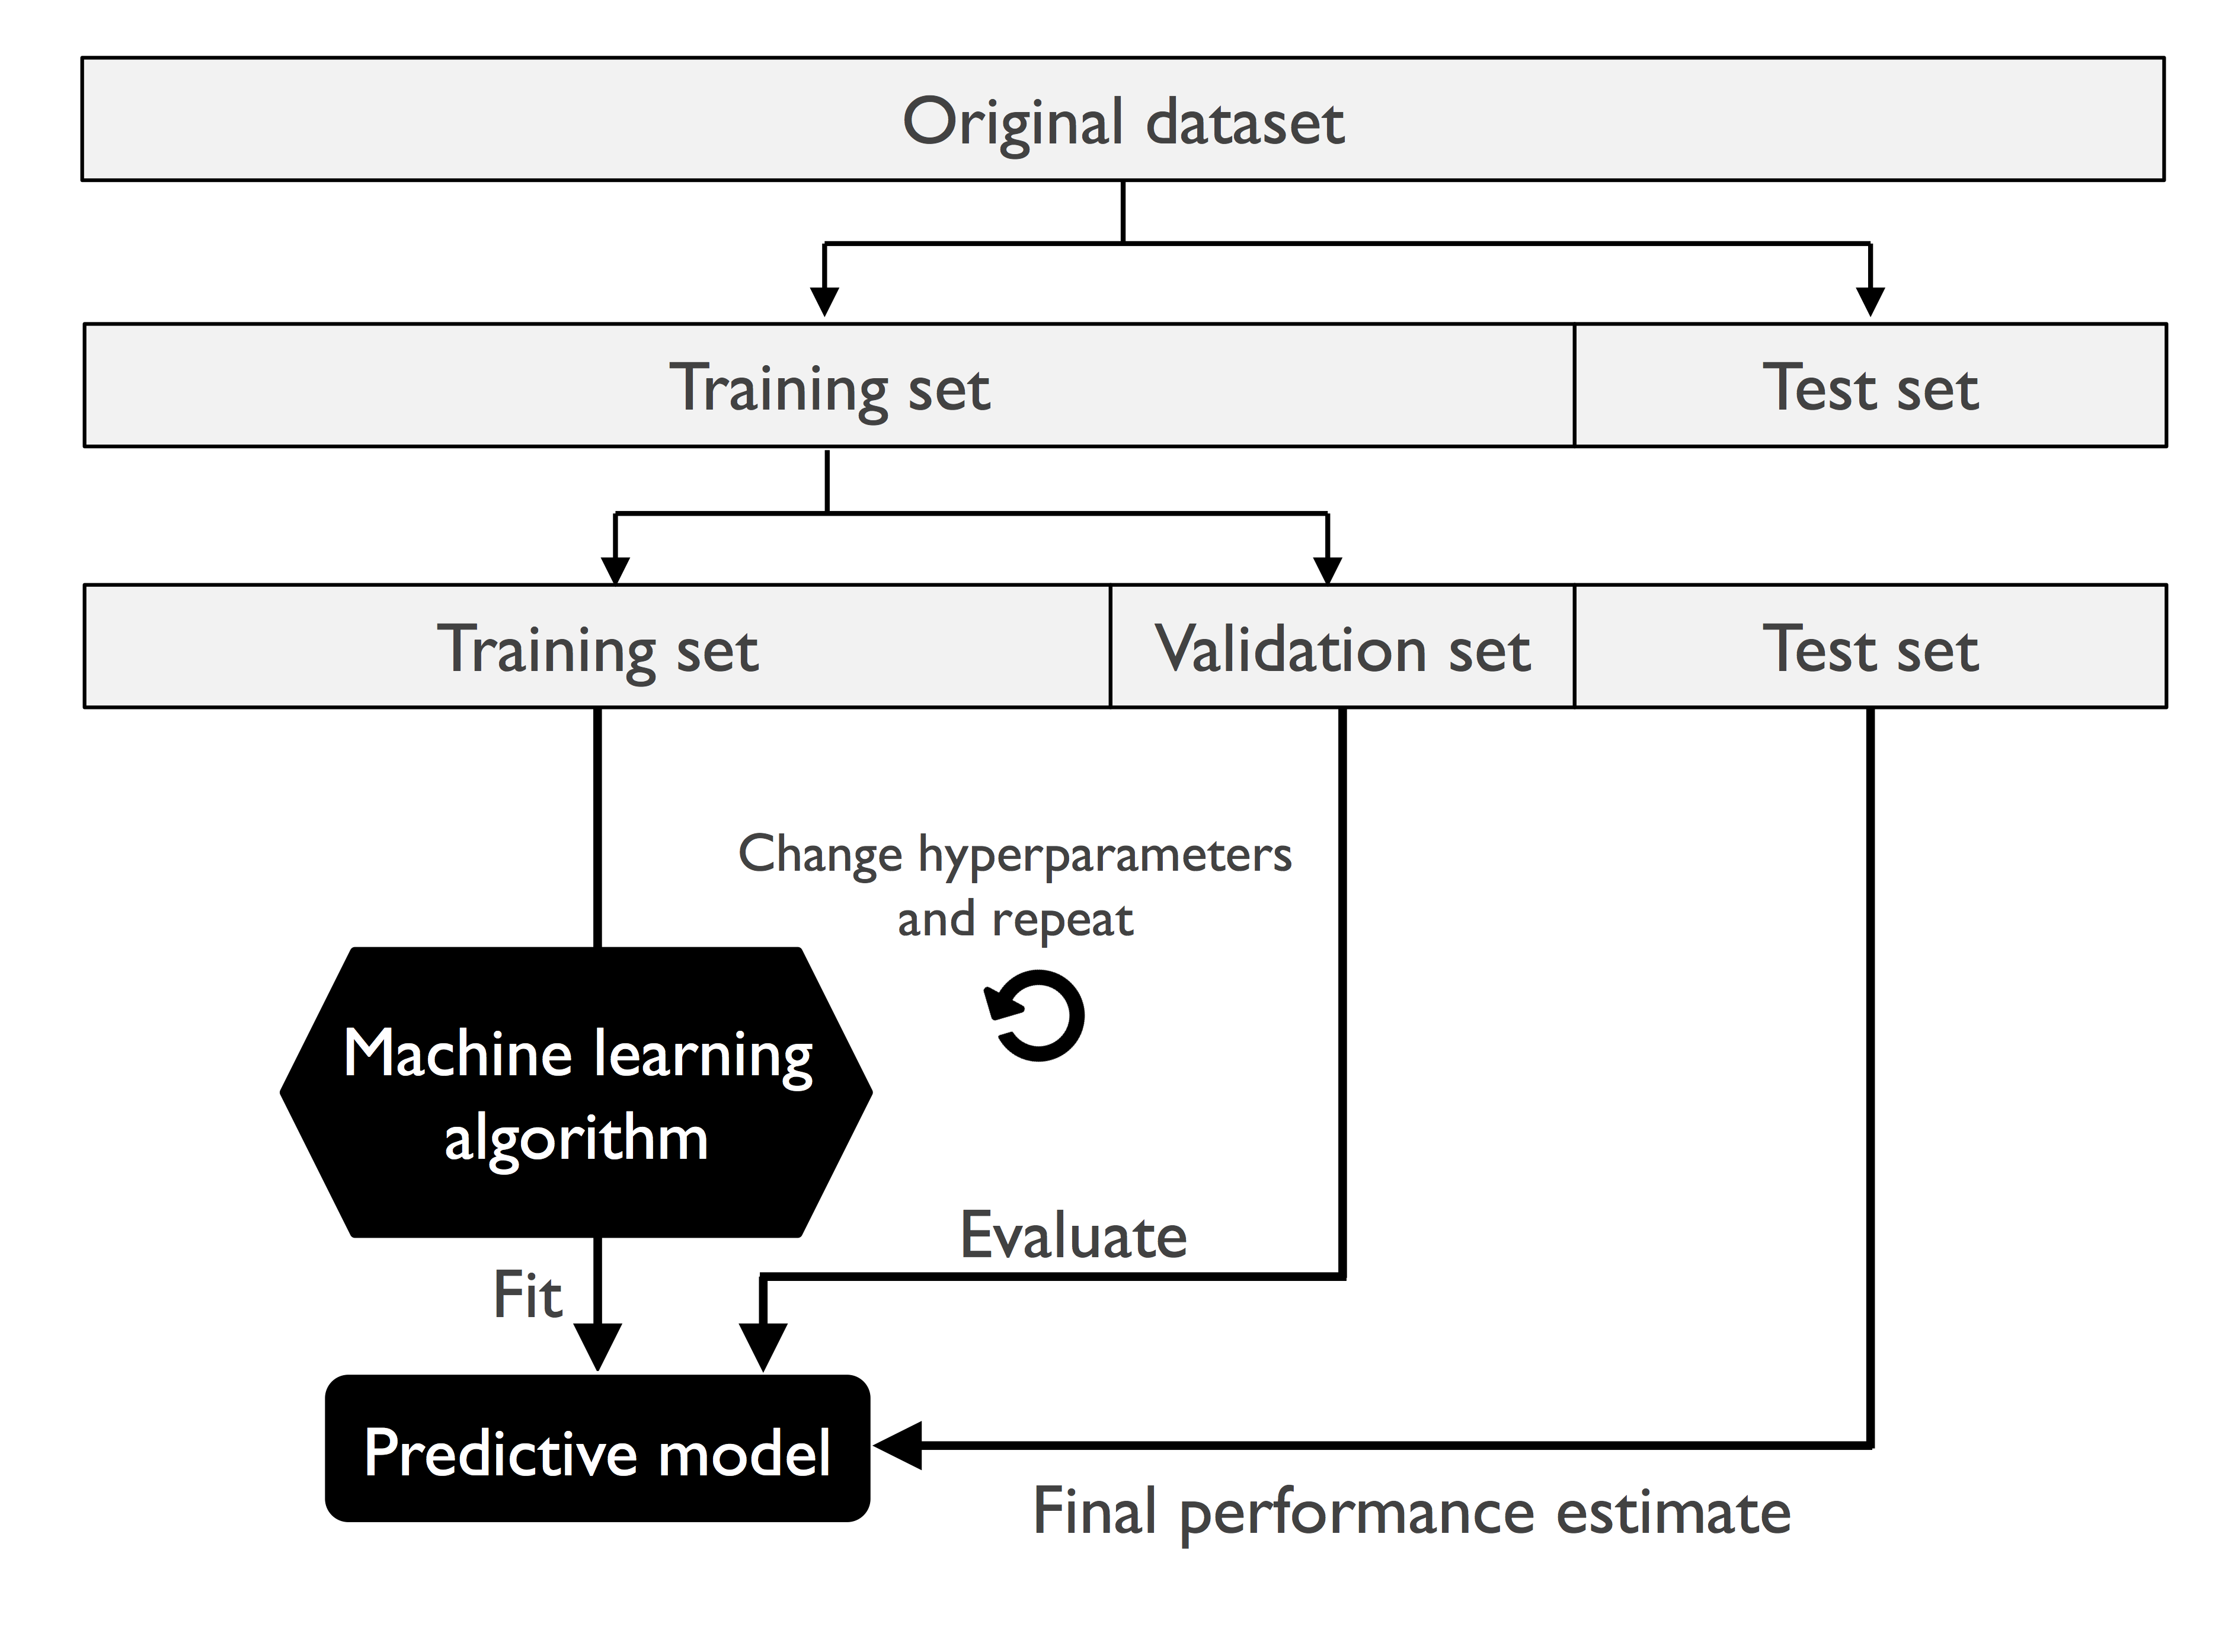


In [135]:
optimizer = Adam(lr=0.00001)

### Computing Gradient
Illustration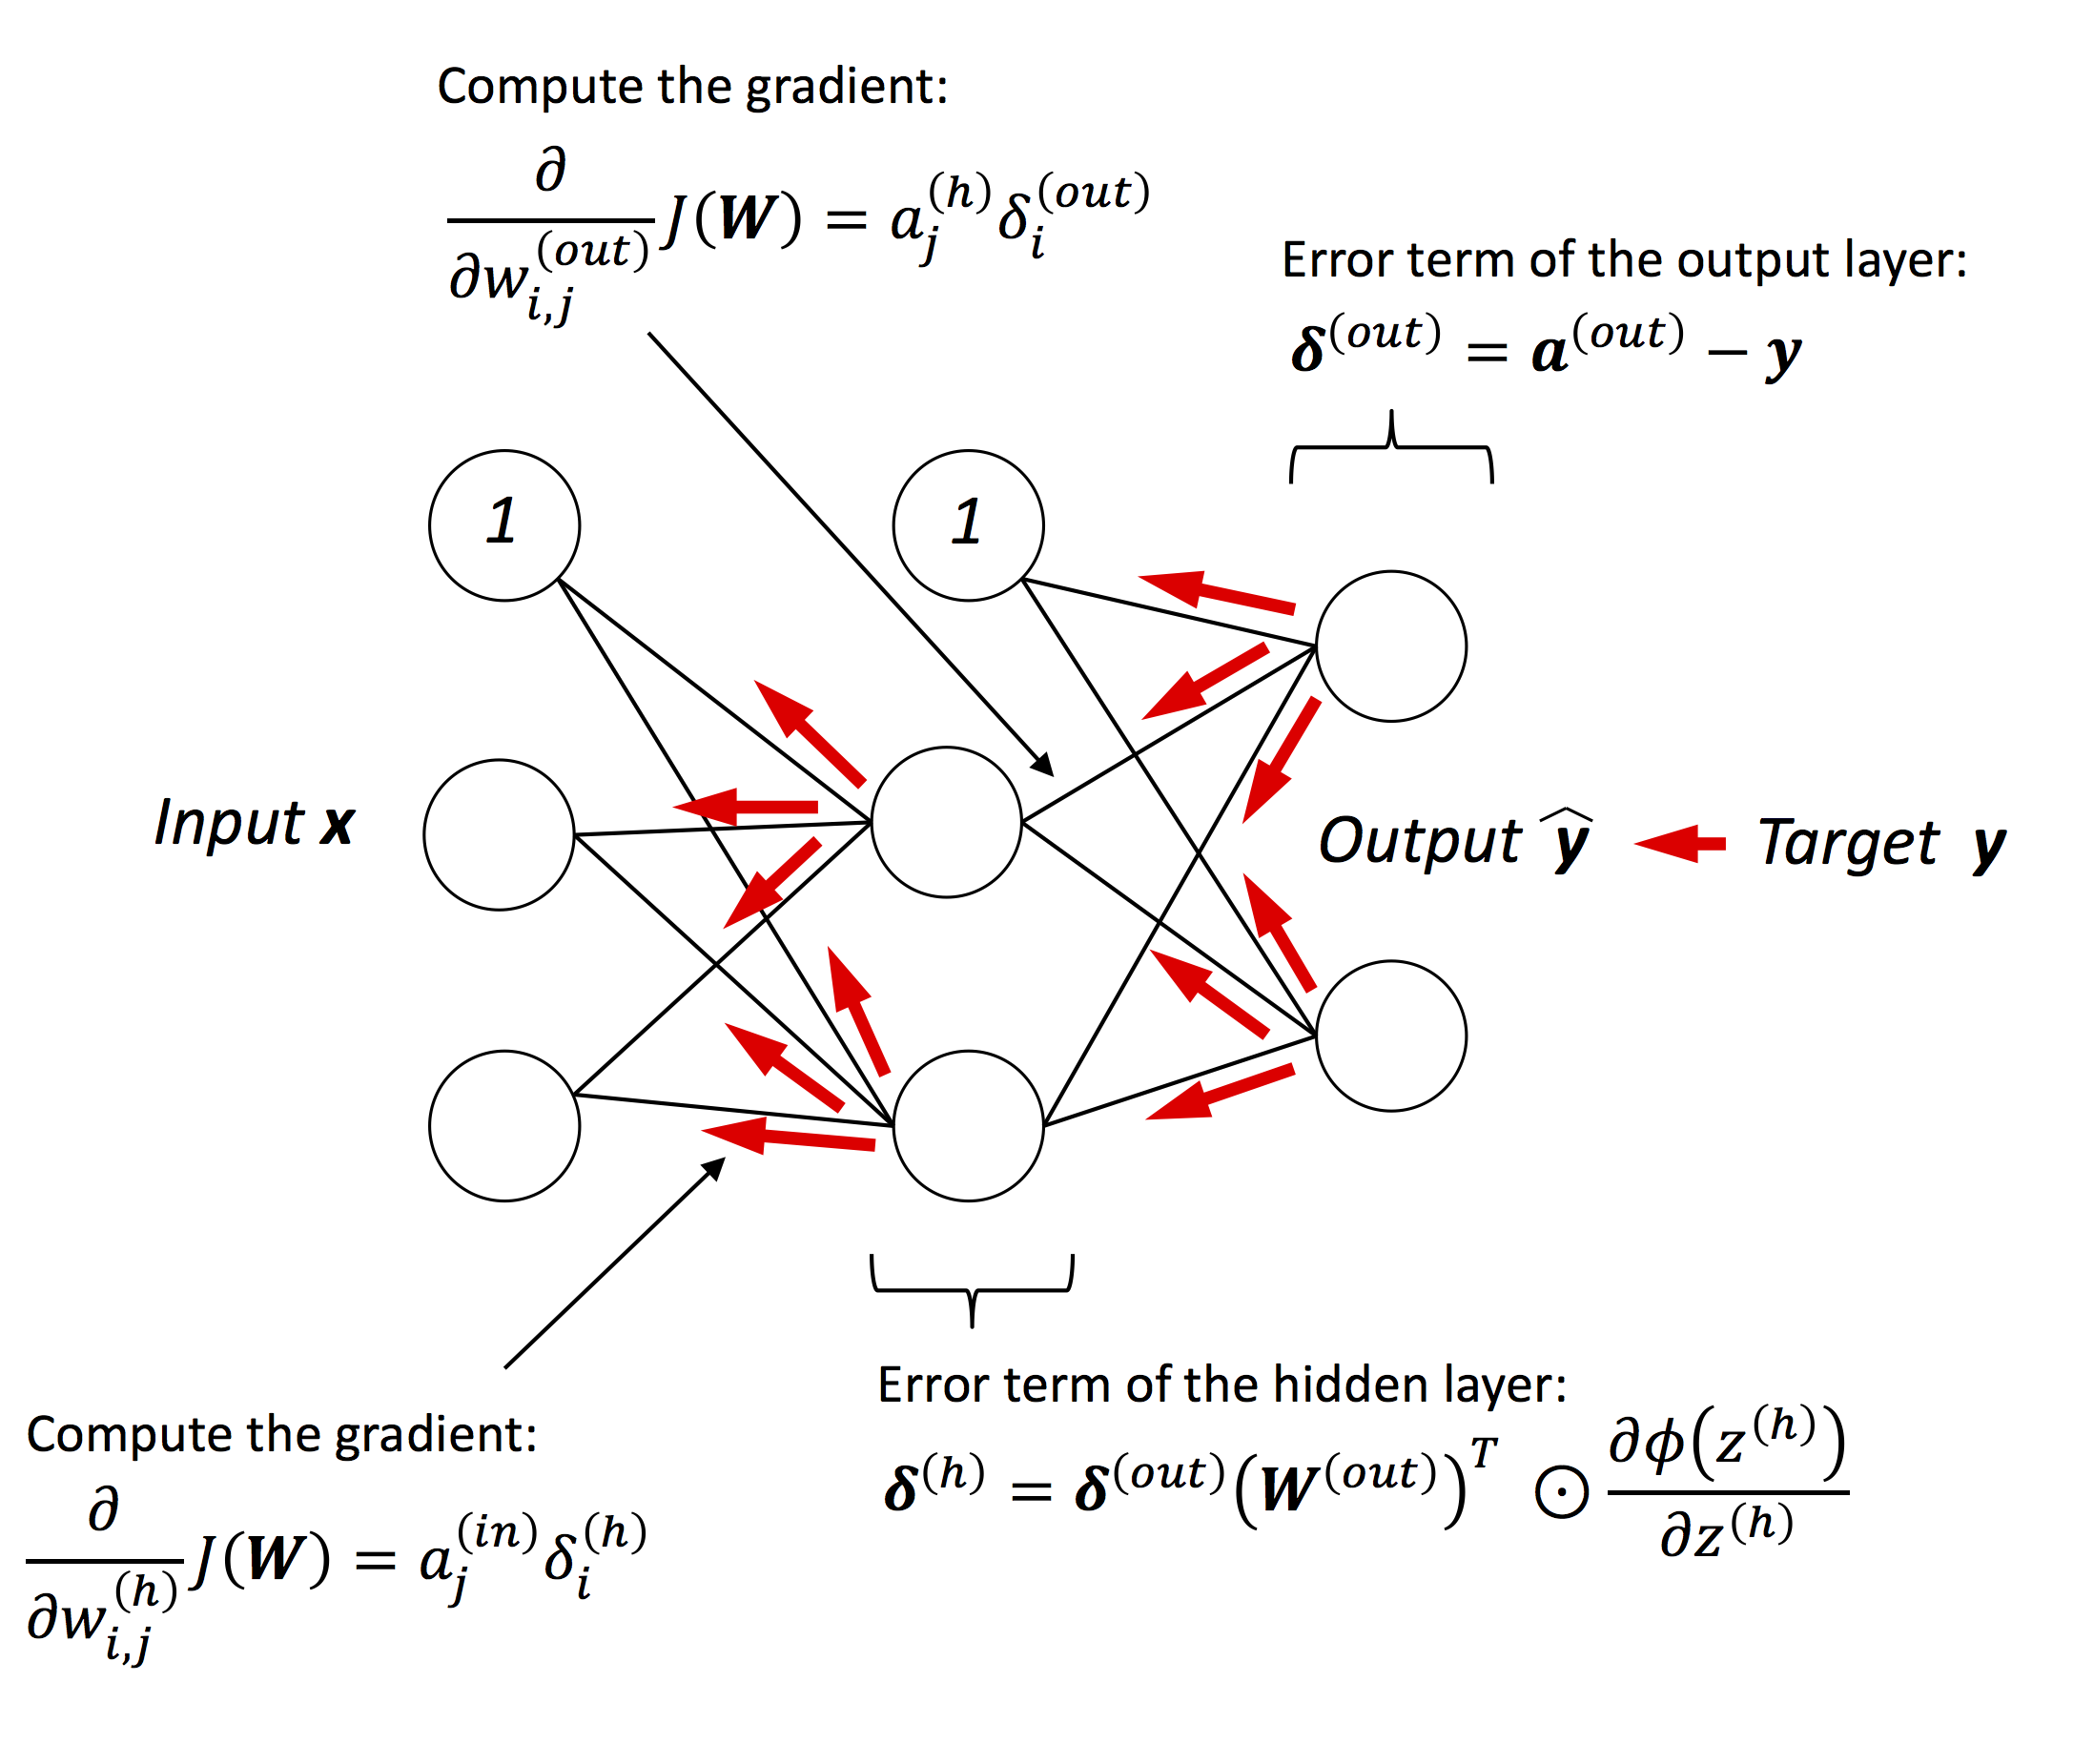

### Finding Global Minima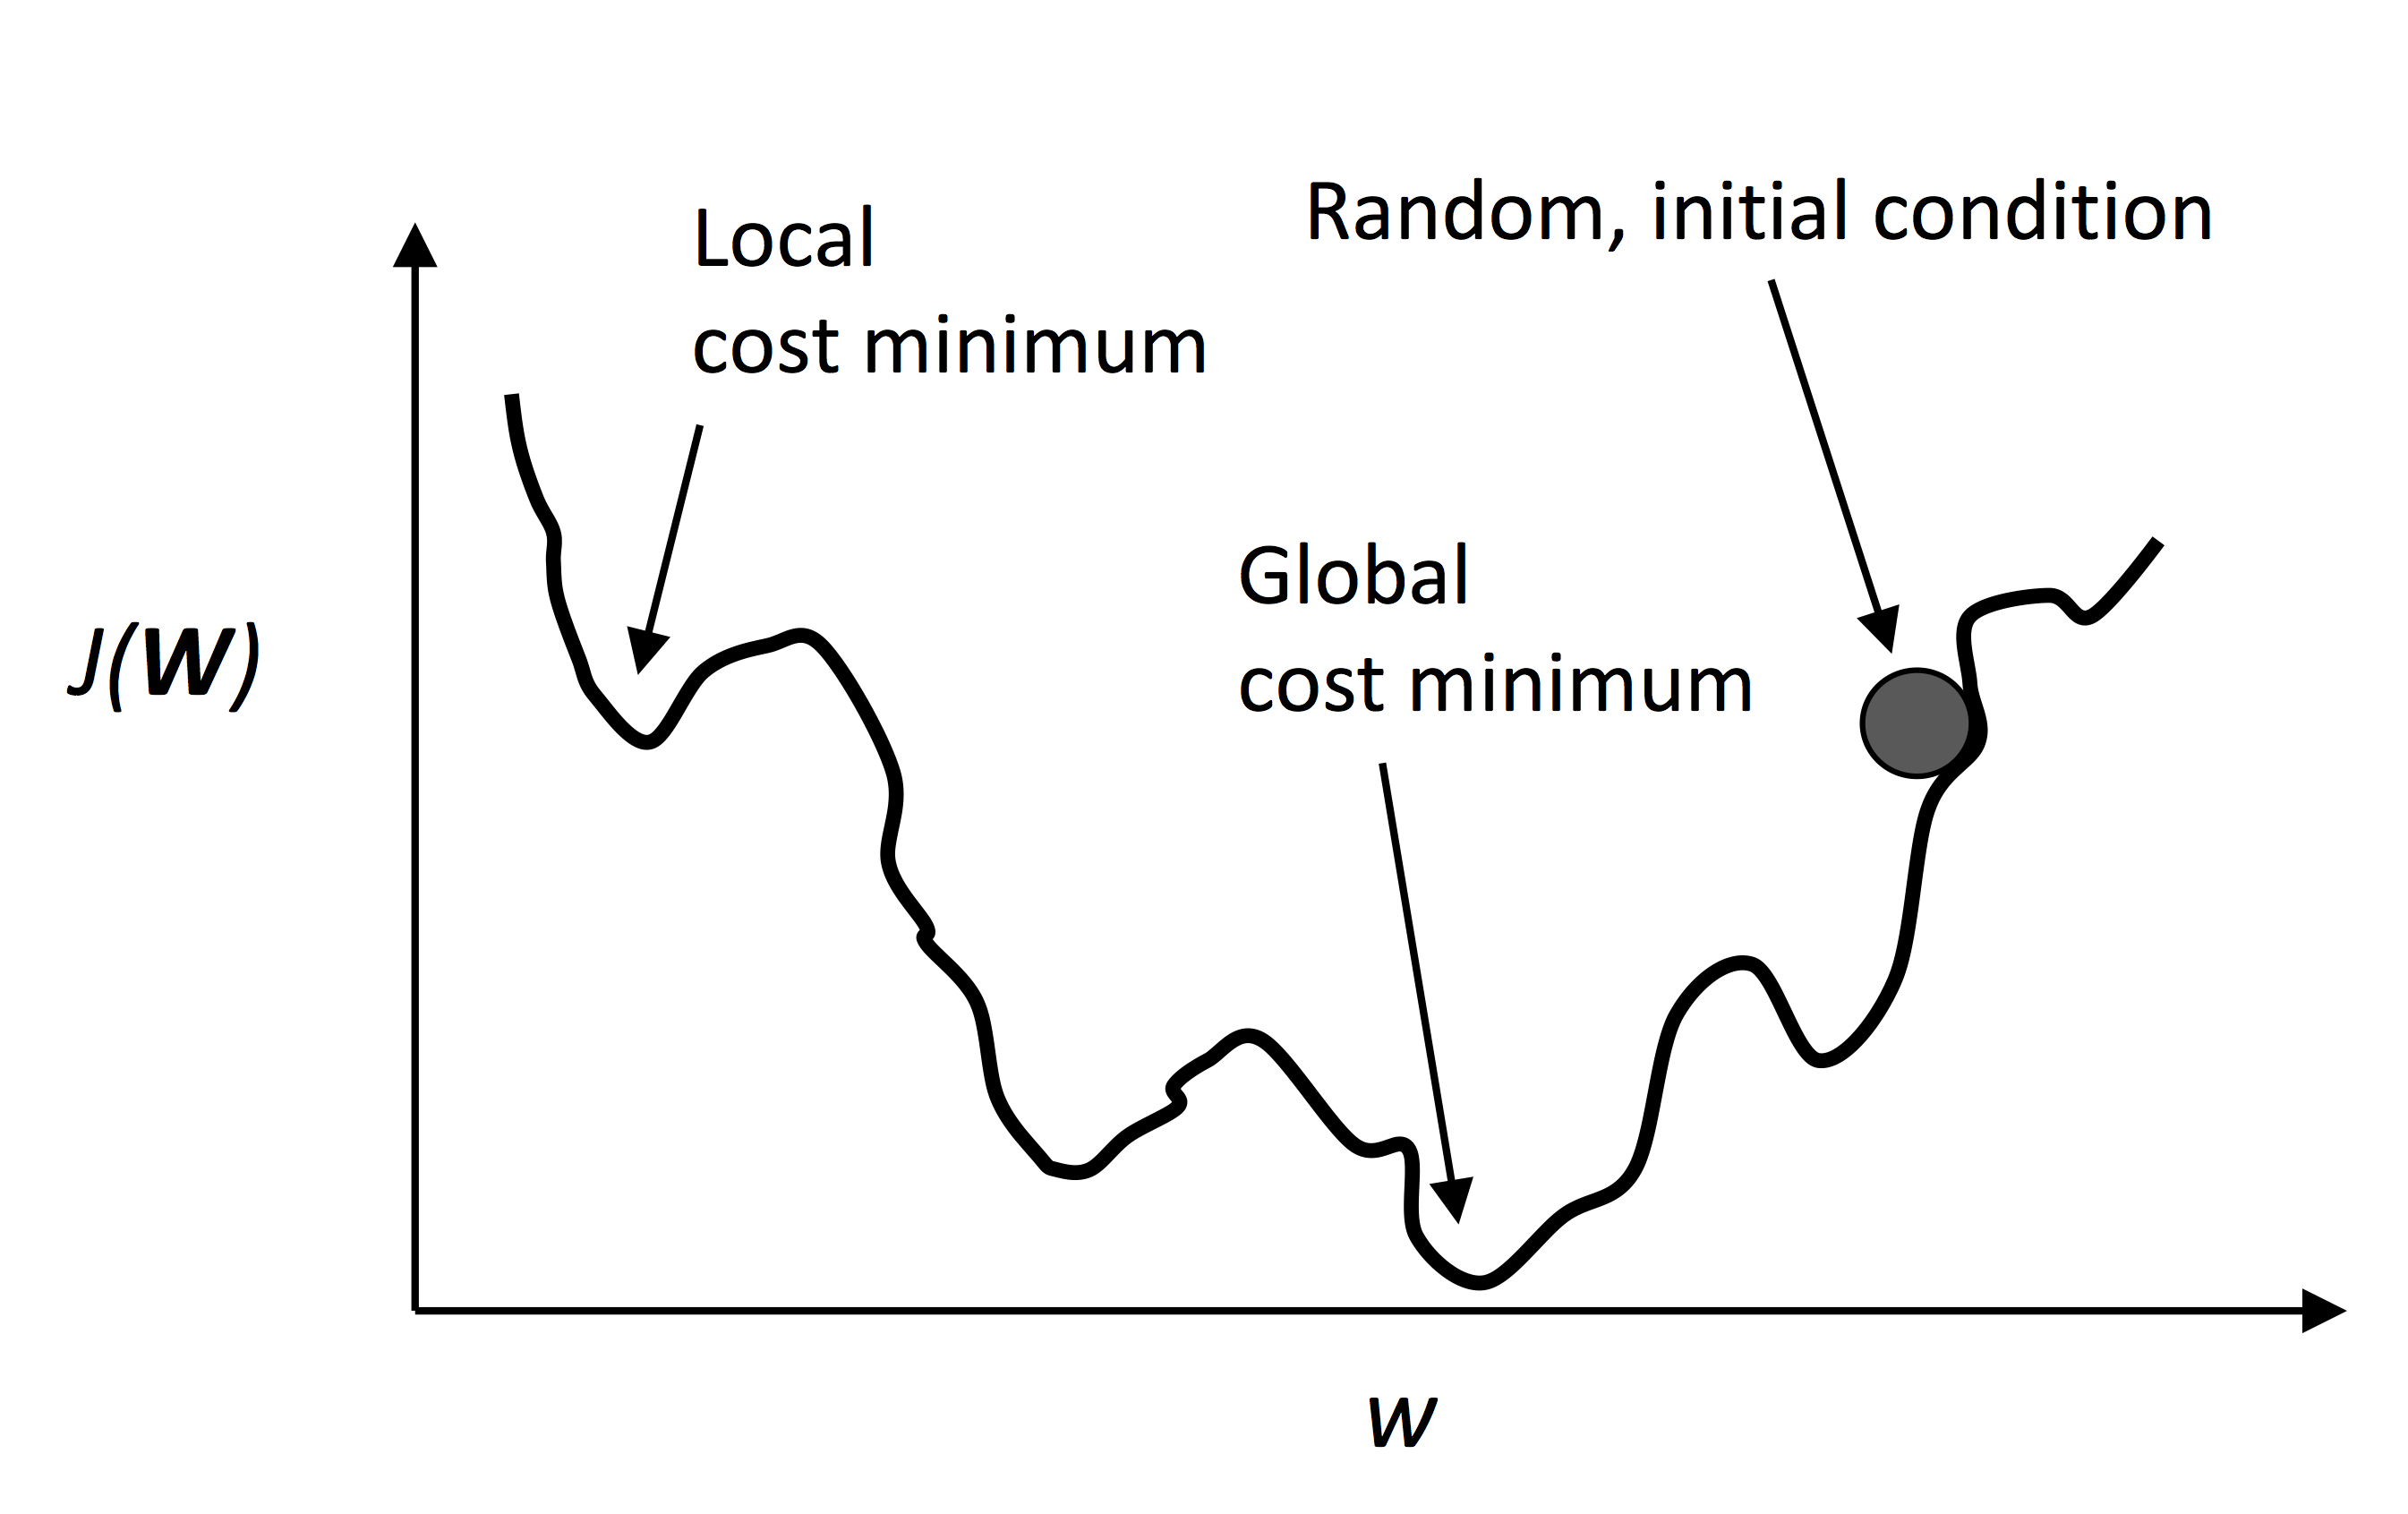